## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 195us/step - loss: 1.9363 - acc: 0.3033 - val_loss: 1.7668 - val_acc: 0.3665
Epoch 2/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.7030 - acc: 0.3904 - val_loss: 1.6546 - val_acc: 0.4089
Epoch 3/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.6151 - acc: 0.4250 - val_loss: 1.6390 - val_acc: 0.4181
Epoch 4/100
50000/50000 [==============================] - 9s 183us/step - loss: 1.5469 - acc: 0.4472 - val_loss: 1.5477 - val_acc: 0.4499
Epoch 5/100
50000/50000 [==============================] - 9s 184us/step - loss: 1.5068 - acc: 0.4602 - val_loss: 1.5499 - val_acc: 0.4570
Epoch 6/100
50000/50000 [==============================] - 9s 183us/step - loss: 1.4673 - acc: 0.4758 - val_loss: 1.5280 - val_acc: 0.4585
Epoch 7/100
50000/50000 [==============================] - 9s 185us/step - loss: 1.4376 - acc: 0.4874 - val_loss: 1

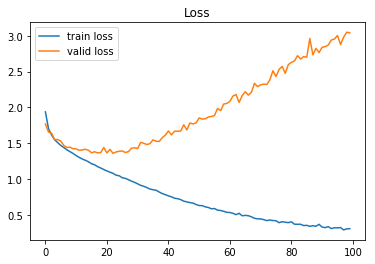

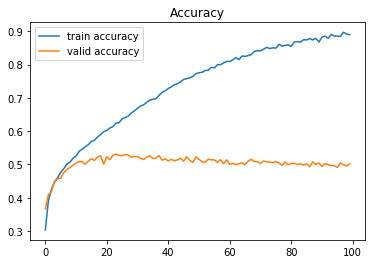

In [9]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [10]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
# 這裡使用跟範例一樣的model
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.8619 - acc: 0.3323 - val_loss: 1.7819 - val_acc: 0.3585
Epoch 2/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.6471 - acc: 0.4155 - val_loss: 1.6477 - val_acc: 0.4082
Epoch 3/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.5573 - acc: 0.4463 - val_loss: 1.5914 - val_acc: 0.4337
Epoch 4/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.4953 - acc: 0.4707 - val_loss: 1.5747 - val_acc: 0.4454
Epoch 5/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.4438 - acc: 0.4886 - val_loss: 1.4626 - val_acc: 0.4783
Epoch 6/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.4015 - acc: 0.5037 - val_loss: 1.4752 - val_acc: 0.4791
Epoch 7/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.3634 - acc: 0.5154 - val_loss: 1.

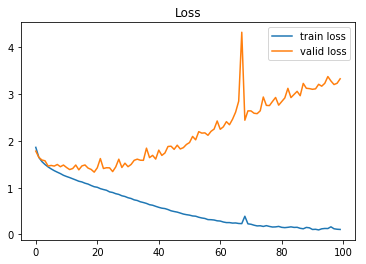

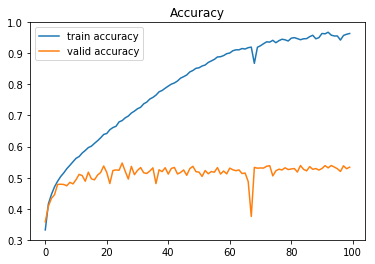

In [14]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

改成 epoch = 500, optimizer = Adam

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [8]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
# 這裡使用跟範例一樣的model
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 173us/step - loss: 2.0708 - acc: 0.2597 - val_loss: 1.9601 - val_acc: 0.2906
Epoch 2/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.8864 - acc: 0.3341 - val_loss: 1.8655 - val_acc: 0.3276
Epoch 3/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.8191 - acc: 0.3577 - val_loss: 1.8138 - val_acc: 0.3671
Epoch 4/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.7752 - acc: 0.3751 - val_loss: 1.7661 - val_acc: 0.3702
Epoch 5/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.7417 - acc: 0.3887 - val_loss: 1.8170 - val_acc: 0.3582
Epoch 6/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.7083 - acc: 0.4012 - val_loss: 1.6928 - val_acc: 0.4115
Epoch 7/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.6803 - acc: 0.4105 - val_loss: 1.

50000/50000 [==============================] - 9s 178us/step - loss: 1.1717 - acc: 0.5893 - val_loss: 1.4976 - val_acc: 0.4754
Epoch 60/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.1654 - acc: 0.5903 - val_loss: 1.3787 - val_acc: 0.5064
Epoch 61/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1620 - acc: 0.5931 - val_loss: 1.4221 - val_acc: 0.4970
Epoch 62/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.1559 - acc: 0.5944 - val_loss: 1.3500 - val_acc: 0.5248
Epoch 63/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1541 - acc: 0.5940 - val_loss: 1.4467 - val_acc: 0.4938
Epoch 64/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1444 - acc: 0.6000 - val_loss: 1.5737 - val_acc: 0.4579
Epoch 65/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1365 - acc: 0.6019 - val_loss: 1.4760 - val_acc: 0.4808
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 9s 172us/step - loss: 0.8610 - acc: 0.7012 - val_loss: 1.3935 - val_acc: 0.5206
Epoch 118/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.8519 - acc: 0.7045 - val_loss: 1.5012 - val_acc: 0.5052
Epoch 119/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.8405 - acc: 0.7105 - val_loss: 1.4728 - val_acc: 0.5167
Epoch 120/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.8423 - acc: 0.7074 - val_loss: 1.6138 - val_acc: 0.4752
Epoch 121/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.8343 - acc: 0.7114 - val_loss: 1.5589 - val_acc: 0.4927
Epoch 122/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.8230 - acc: 0.7166 - val_loss: 1.4697 - val_acc: 0.5239
Epoch 123/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.8266 - acc: 0.7135 - val_loss: 1.4294 - val_acc: 0.5247
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 8s 160us/step - loss: 0.5761 - acc: 0.8039 - val_loss: 1.6289 - val_acc: 0.5169
Epoch 176/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.5558 - acc: 0.8124 - val_loss: 1.7160 - val_acc: 0.5087
Epoch 177/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.5468 - acc: 0.8146 - val_loss: 1.6622 - val_acc: 0.5131
Epoch 178/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.5480 - acc: 0.8141 - val_loss: 1.5979 - val_acc: 0.5279
Epoch 179/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.5617 - acc: 0.8107 - val_loss: 1.6362 - val_acc: 0.5243
Epoch 180/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.5299 - acc: 0.8226 - val_loss: 1.6259 - val_acc: 0.5287
Epoch 181/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.5413 - acc: 0.8180 - val_loss: 1.7387 - val_acc: 0.5064
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 8s 160us/step - loss: 0.3369 - acc: 0.8970 - val_loss: 2.0915 - val_acc: 0.4954
Epoch 234/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.3238 - acc: 0.8988 - val_loss: 1.9728 - val_acc: 0.5194
Epoch 235/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.2737 - acc: 0.9176 - val_loss: 1.9160 - val_acc: 0.5230
Epoch 236/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.2868 - acc: 0.9136 - val_loss: 1.9125 - val_acc: 0.5212
Epoch 237/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.3265 - acc: 0.9042 - val_loss: 2.0128 - val_acc: 0.5179
Epoch 238/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.2948 - acc: 0.9112 - val_loss: 1.9460 - val_acc: 0.5297
Epoch 239/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.3073 - acc: 0.9040 - val_loss: 2.1762 - val_acc: 0.5030
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 8s 161us/step - loss: 0.1015 - acc: 0.9799 - val_loss: 2.3617 - val_acc: 0.5181
Epoch 292/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.2092 - acc: 0.9480 - val_loss: 2.2718 - val_acc: 0.5355
Epoch 293/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.2009 - acc: 0.9521 - val_loss: 2.2357 - val_acc: 0.5342
Epoch 294/500
50000/50000 [==============================] - 8s 167us/step - loss: 0.2685 - acc: 0.9300 - val_loss: 2.4662 - val_acc: 0.5093
Epoch 295/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.1554 - acc: 0.9648 - val_loss: 2.2302 - val_acc: 0.5354
Epoch 296/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.0894 - acc: 0.9836 - val_loss: 2.3968 - val_acc: 0.5164
Epoch 297/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.1652 - acc: 0.9591 - val_loss: 2.2106 - val_acc: 0.5334
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 8s 161us/step - loss: 0.0326 - acc: 0.9977 - val_loss: 2.5907 - val_acc: 0.5339
Epoch 350/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.0322 - acc: 0.9976 - val_loss: 2.6333 - val_acc: 0.5246
Epoch 351/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0309 - acc: 0.9975 - val_loss: 2.7660 - val_acc: 0.5149
Epoch 352/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.3597 - acc: 0.9102 - val_loss: 2.5887 - val_acc: 0.5362
Epoch 353/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.0390 - acc: 0.9964 - val_loss: 2.6065 - val_acc: 0.5319
Epoch 354/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0342 - acc: 0.9973 - val_loss: 2.5754 - val_acc: 0.5376
Epoch 355/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0317 - acc: 0.9979 - val_loss: 2.6270 - val_acc: 0.5373
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 8s 160us/step - loss: 0.0124 - acc: 0.9999 - val_loss: 2.9010 - val_acc: 0.5340
Epoch 408/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.0125 - acc: 0.9997 - val_loss: 2.8894 - val_acc: 0.5364
Epoch 409/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.0121 - acc: 0.9998 - val_loss: 2.9022 - val_acc: 0.5347
Epoch 410/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.0120 - acc: 0.9998 - val_loss: 2.9127 - val_acc: 0.5352
Epoch 411/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0120 - acc: 0.9998 - val_loss: 2.9083 - val_acc: 0.5372
Epoch 412/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0117 - acc: 0.9997 - val_loss: 2.9079 - val_acc: 0.5372
Epoch 413/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.0118 - acc: 0.9996 - val_loss: 2.9177 - val_acc: 0.5349
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 8s 161us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 3.0887 - val_acc: 0.5361
Epoch 466/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 3.0948 - val_acc: 0.5377
Epoch 467/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 3.0968 - val_acc: 0.5350
Epoch 468/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 3.1028 - val_acc: 0.5332
Epoch 469/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.1036 - val_acc: 0.5368
Epoch 470/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.1042 - val_acc: 0.5356
Epoch 471/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.1093 - val_acc: 0.5368
Epoch 472/500
50000/50000 [

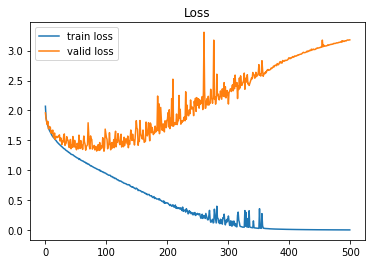

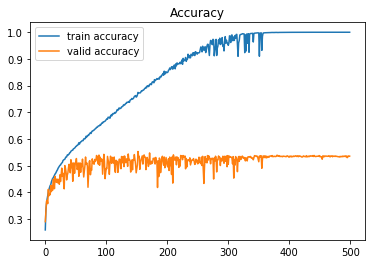

In [12]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()